# Multiple Linear Regression : Prediction House Price

In [1]:
import numpy as np

x_train = [[0.18, 0.89],[1.  ,  0.26] , [0.92, 0.11 ] ,  [0.07, 0.37] , [0.85, 0.16],[0.99, 0.41],[0.87, 0.47]]
y_train= [109.85 ,  155.72 ,  137.66 ,  76.17  , 139.75 ,  162.6 , 151.77]

x_test = [[0.49 , 0.18] , [0.57 , 0.83] , [0.56 , 0.64] , [0.76 , 0.18]]

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)

# Normalize the features (optional but recommended for better convergence)
X_train_normalized = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0)
X_pred_normalized = (x_test - x_train.mean(axis=0)) / x_train.std(axis=0)

# Add a column of ones for the intercept term
X_train_normalized = np.concatenate((np.ones((X_train_normalized.shape[0], 1)), X_train_normalized), axis=1)
X_pred_normalized = np.concatenate((np.ones((X_pred_normalized.shape[0], 1)), X_pred_normalized), axis=1)

# Compute the coefficients (weights) using the normal equation
coefficients = np.linalg.inv(X_train_normalized.T @ X_train_normalized) @ X_train_normalized.T @ y_train
    
# Predict prices for the prediction houses
y_pred = X_pred_normalized @ coefficients
    
# Print each predicted price
for pred in y_pred:
    print(pred)

105.21455835106943
142.67095130729925
132.93605469124694
129.70175404502453


# Multi-collinearity

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression

# Generate synthetic data with multicollinearity
np.random.seed(0)
X, y = make_regression(n_samples=100, n_features=2, noise=10)
X[:, 1] = X[:, 0] * 0.9 + np.random.normal(size=100) * 0.1  # introducing high correlation

# Convert to DataFrame for convenience
df = pd.DataFrame(X, columns=['X1', 'X2'])
df['y'] = y

# Calculate VIF for each predictor
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Display VIF
print("Variance Inflation Factors (VIF):")
print(calculate_vif(df[['X1', 'X2']]))

# Fit ordinary least squares (OLS) model without handling multicollinearity
X = sm.add_constant(X)  # add constant for intercept term
model = sm.OLS(y, X)
results = model.fit()

# Print summary of the regression results without handling multicollinearity
print("\nResults without handling multicollinearity:")
print(results.summary())

# Drop one of the correlated variables based on VIF (choosing X2 in this case)
X_drop = df[['X1']]
y_drop = df['y']

# Fit OLS model after dropping X2
X_drop = sm.add_constant(X_drop)  # add constant for intercept term
model_drop = sm.OLS(y_drop, X_drop)
results_drop = model_drop.fit()

# Print summary of the regression results after dropping X2 based on VIF
print("\nResults after dropping X2 based on VIF:")
print(results_drop.summary())


Variance Inflation Factors (VIF):
  Feature        VIF
0      X1  81.453827
1      X2  81.453827

Results without handling multicollinearity:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.866
Date:                Tue, 25 Jun 2024   Prob (F-statistic):             0.0242
Time:                        11:07:23   Log-Likelihood:                -601.89
No. Observations:                 100   AIC:                             1210.
Df Residuals:                      97   BIC:                             1218.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

# Example of Instability in Coefficients:

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate synthetic data with multicollinearity
np.random.seed(0)
X, y = make_regression(n_samples=100, n_features=2, noise=10)
X[:, 1] = X[:, 0]  * 0.9 + np.random.normal(size=100) * 0.1  # introducing high correlation

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients and their standard errors
coefficients = model.coef_
std_errors = np.sqrt(np.diag(np.linalg.inv(X.T @ X)))

# Print coefficients and standard errors
print("Coefficients:", coefficients)
print("Standard Errors:", std_errors)


Coefficients: [101.51878985 -83.79018671]
Standard Errors: [0.87981799 0.97493787]


# Example: Redundancy in Information Due to Multicollinearity

Coefficients: [101.51878985 -83.79018671]
Intercept: -0.6004803696933458


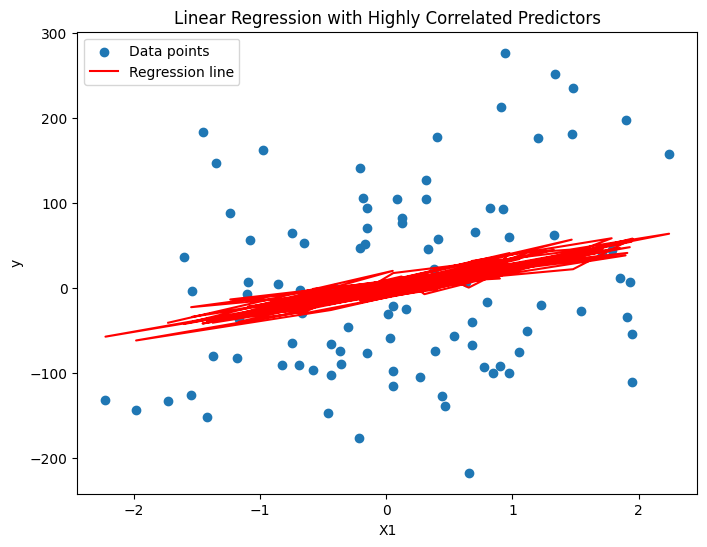

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate synthetic data with high correlation between predictors
np.random.seed(0)
X, y = make_regression(n_samples=100, n_features=2, noise=10)
X[:, 1] = X[:, 0]  * 0.9 + np.random.normal(size=100) * 0.1  # introducing high correlation

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients and their standard errors
coefficients = model.coef_
intercept = model.intercept_

# Print coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Scatter plot of the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, label='Data points')
plt.plot(X[:, 0], model.predict(X), color='red', label='Regression line')
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Linear Regression with Highly Correlated Predictors')
plt.legend()
plt.show()


# Example: Amplification of Small Changes Due to Multicollinearity

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Function to create synthetic data with high correlation between predictors
def generate_data(correlation=0.9):
    np.random.seed(0)
    X, y = make_regression(n_samples=100, n_features=2, noise=10)
    X[:, 1] = X[:, 0] * correlation + np.random.normal(size=100) * (1 - correlation)  # introduce high correlation
    return X, y

# Function to fit a linear regression model and print coefficients
def fit_and_print_coefficients(X, y):
    model = LinearRegression()
    model.fit(X, y)
    coefficients = model.coef_
    intercept = model.intercept_
    print("Coefficients:", coefficients)
    print("Intercept:", intercept)
    return model

# Generate synthetic data with different levels of correlation
X_high_corr, y = generate_data(correlation=0.9)
X_low_corr, y = generate_data(correlation=0.1)

# Fit linear regression models and print coefficients
print("High correlation (X1 and X2 are highly correlated):")
model_high_corr = fit_and_print_coefficients(X_high_corr, y)

print("\nLow correlation (X1 and X2 are weakly correlated):")
model_low_corr = fit_and_print_coefficients(X_low_corr, y)


High correlation (X1 and X2 are highly correlated):
Coefficients: [101.51878985 -83.79018671]
Intercept: -0.6004803696933441

Low correlation (X1 and X2 are weakly correlated):
Coefficients: [27.03862388 -9.31002075]
Intercept: -0.6004803696933423


# Explanation of LogisticRegression_with_p_values Class:

In [6]:
from sklearn import linear_model
from scipy.stats import norm
class LogisticRegression_with_p_values:

    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)

    def fit(self, X, y):
        self.model.fit( X, y)
        # Computing Cramer-Rao Lower Bound (Fisher Information Matrix F_ij)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom , (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)

        
        Cramer_Rao = np.linalg.pinv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        print(z_scores)
        p_values = [norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values


In [7]:
# Example usage
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only two features for simplicity
y = (iris.target == 0).astype(int)  # Binary classification (Setosa vs rest)

# Instantiate the LogisticRegression_with_p_values class
logreg_with_p_values = LogisticRegression_with_p_values()

# Fit the model
logreg_with_p_values.fit(X, y)

# Access coefficients, intercept, and p-values
print("Coefficients:", logreg_with_p_values.coef_)
print("Intercept:", logreg_with_p_values.intercept_)
print("P-values:", logreg_with_p_values.p_values)


[-9.31997707  5.01857335]
Coefficients: [[-3.38828053  3.1645602 ]]
Intercept: [8.32315487]
P-values: [1.1636544963522124e-20, 5.205661808541713e-07]


# The slope of the regression line

In [8]:
import numpy as np

# Given data
physics_scores = np.array([15, 12, 8, 8, 7, 7, 7, 6, 5, 3])
history_scores = np.array([10, 25, 17, 11, 13, 17, 20, 13, 9, 15])

# Compute mean of Physics scores and History scores
mean_physics = np.mean(physics_scores)
mean_history = np.mean(history_scores)

# Compute deviations
dev_physics = physics_scores - mean_physics
dev_history = history_scores - mean_history

# Compute covariance and variance
covariance = np.sum(dev_physics * dev_history) / len(physics_scores)
variance_physics = np.sum(dev_physics**2) / len(physics_scores)

# Calculate slope (b)
slope = covariance / variance_physics

# Print slope rounded to three decimal places
print(f"{slope:.3f}")


0.208


# One-way ANOVA

In [9]:
import scipy.stats as stats

# Data for three groups (example data)
group1 = [5, 8, 7, 6, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 4, 5, 6, 7, 8, 9, 6, 7, 8, 9, 5, 6, 7, 8, 9]
group2 = [3, 6, 4, 5, 3, 4, 5, 6, 7, 4, 5, 6, 7, 4, 5, 6, 3, 4, 5, 6, 7, 4, 5, 6, 7, 4, 5, 6, 3, 4]
group3 = [1, 2, 1, 3, 2, 1, 2, 3, 1, 2, 1, 3, 2, 1, 2, 3, 1, 2, 1, 3, 2, 1, 2, 3, 1, 2, 1, 3, 2, 1]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 122.92160278745637
P-value: 4.4839495021785895e-26


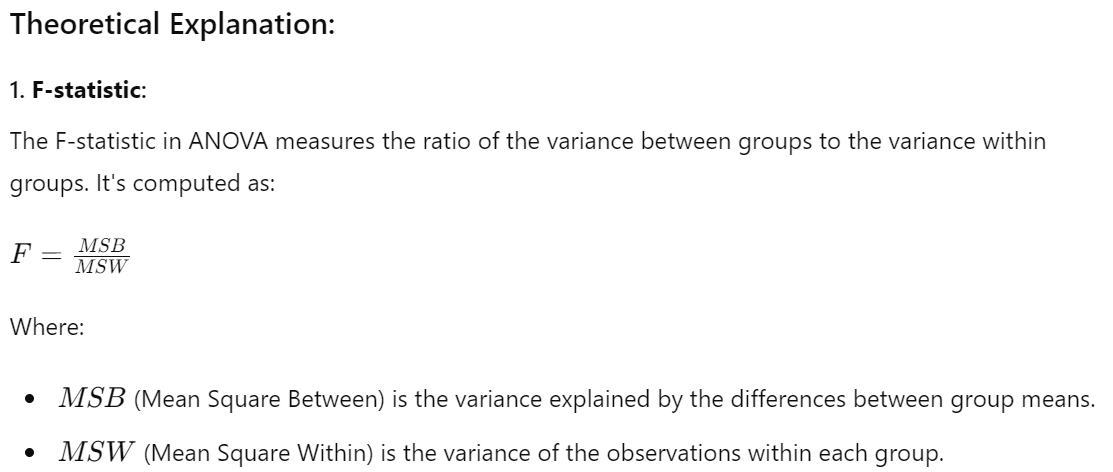
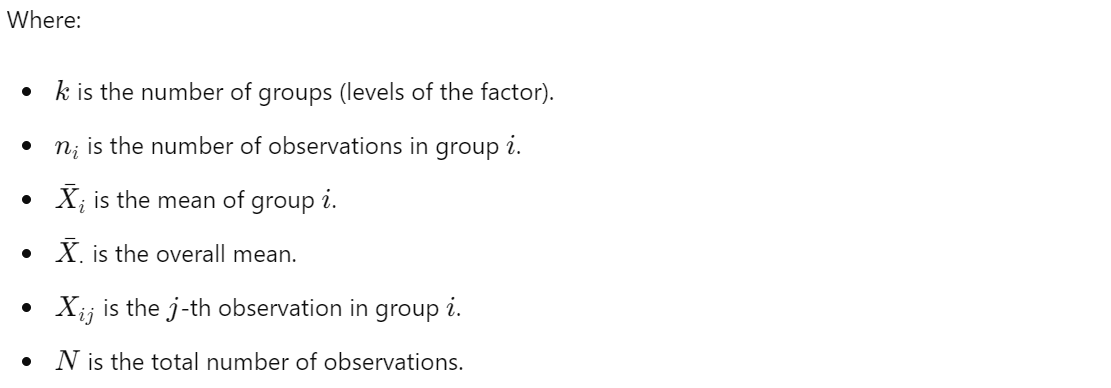

In [11]:
def compute_f_statistic(groups):
    # Convert groups to a list of lists (if it's not already)
    groups = [list(group) for group in groups]
    
    # Number of groups
    k = len(groups)
    
    # Total number of observations
    N = sum(len(group) for group in groups)
    
    # Calculate overall mean
    overall_mean = sum(sum(group) for group in groups) / N
    
    # Calculate SSB (between-group sum of squares)
    SSB = 0
    for group in groups:
        group_mean = sum(group) / len(group)
        SSB += len(group) * (group_mean - overall_mean) ** 2
    
    # Degrees of freedom for between-group variance
    df_between = k - 1
    
    # Calculate SSW (within-group sum of squares)
    SSW = 0
    for group in groups:
        group_ssw = sum((x - sum(group) / len(group)) ** 2 for x in group)
        SSW += group_ssw
    
    # Degrees of freedom for within-group variance
    df_within = N - k
    
    # Calculate MSB (mean square between) and MSW (mean square within)
    MSB = SSB / df_between
    MSW = SSW / df_within
    
    # Calculate F-statistic
    F_statistic = MSB / MSW
    
    return F_statistic, df_between, df_within

# Example data
group1 = [5, 8, 7, 6, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 4, 5, 6, 7, 8, 9, 6, 7, 8, 9, 5, 6, 7, 8, 9]
group2 = [3, 6, 4, 5, 3, 4, 5, 6, 7, 4, 5, 6, 7, 4, 5, 6, 3, 4, 5, 6, 7, 4, 5, 6, 7, 4, 5, 6, 3, 4]
group3 = [1, 2, 1, 3, 2, 1, 2, 3, 1, 2, 1, 3, 2, 1, 2, 3, 1, 2, 1, 3, 2, 1, 2, 3, 1, 2, 1, 3, 2, 1]

# Compute F-statistic
groups = [group1, group2, group3]
F_statistic, df_between, df_within = compute_f_statistic(groups)

print("F-statistic:", F_statistic)
print("Degrees of freedom - Between:", df_between)
print("Degrees of freedom - Within:", df_within)


F-statistic: 122.9216027874565
Degrees of freedom - Between: 2
Degrees of freedom - Within: 87


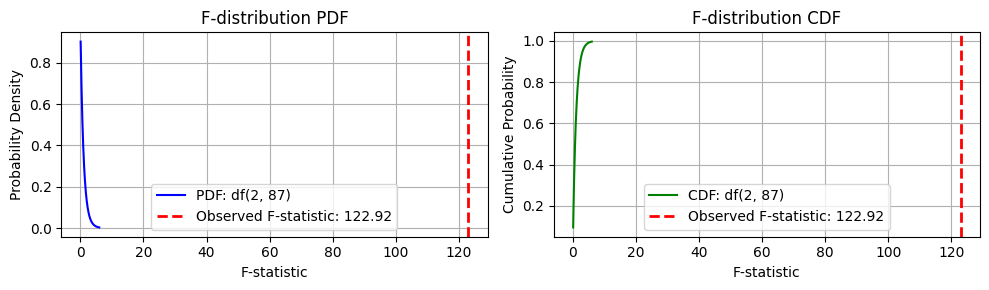

Observed F-statistic: 122.92
Degrees of freedom - Between: 2
Degrees of freedom - Within: 87
Calculated p-value: 0.000000


In [23]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
df_between = 2  # degrees of freedom for between-group variance
df_within = 87  # degrees of freedom for within-group variance

# Generate x values for plotting
x = np.linspace(0.1, 6, 1000)  # Adjust the range based on your distribution

# Compute PDF and CDF of F-distribution
pdf = stats.f.pdf(x, df_between, df_within)
cdf = stats.f.cdf(x, df_between, df_within)

# Compute p-value for observed F-statistic
F_statistic = 122.9216027874565
p_value = 1 - stats.f.cdf(F_statistic, df_between, df_within)

# Plot F-distribution PDF
plt.figure(figsize=(10, 3))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(x, pdf, 'b-', label=f'PDF: df({df_between}, {df_within})')
plt.axvline(x=F_statistic, color='r', linestyle='--', linewidth=2, label=f'Observed F-statistic: {F_statistic:.2f}')
plt.title('F-distribution PDF')
plt.xlabel('F-statistic')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, 'g-', label=f'CDF: df({df_between}, {df_within})')
plt.axvline(x=F_statistic, color='r', linestyle='--', linewidth=2, label=f'Observed F-statistic: {F_statistic:.2f}')
plt.title('F-distribution CDF')
plt.xlabel('F-statistic')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)

# Display plot
plt.tight_layout()
plt.show()

# Display p-value
print(f"Observed F-statistic: {F_statistic:.2f}")
print(f"Degrees of freedom - Between: {df_between}")
print(f"Degrees of freedom - Within: {df_within}")
print(f"Calculated p-value: {p_value:.6f}")


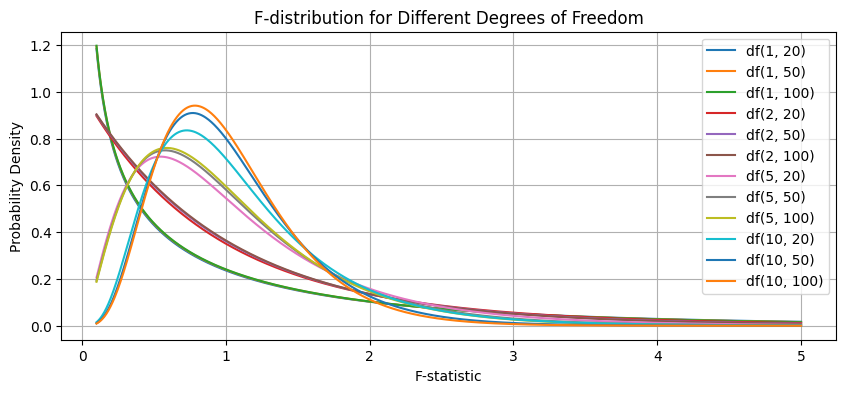

In [25]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define degrees of freedom parameters
df_between_values = [1, 2, 5, 10]  # degrees of freedom for between-group variance
df_within_values = [20, 50, 100]   # degrees of freedom for within-group variance

# Generate x values for plotting F-distribution
x = np.linspace(0.1, 5, 1000)

# Plot F-distributions for different df_between and df_within values
plt.figure(figsize=(10, 4))

for df_between in df_between_values:
    for df_within in df_within_values:
        # Compute PDF of F-distribution
        pdf = stats.f.pdf(x, df_between, df_within)
        plt.plot(x, pdf, label=f'df({df_between}, {df_within})')

plt.title('F-distribution for Different Degrees of Freedom')
plt.xlabel('F-statistic')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


# T-distribution

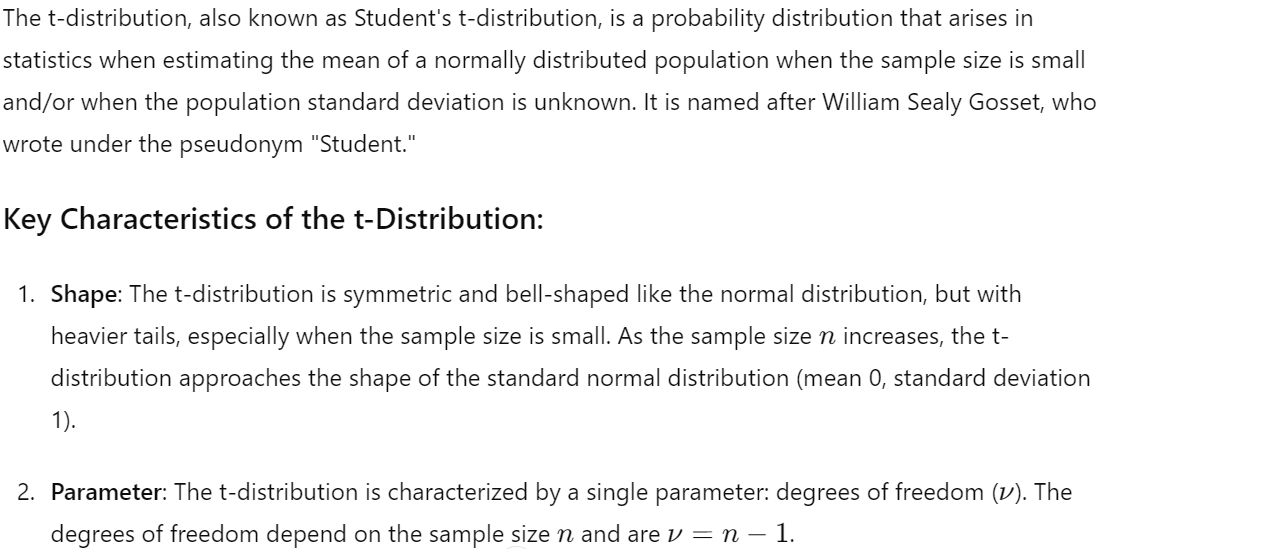
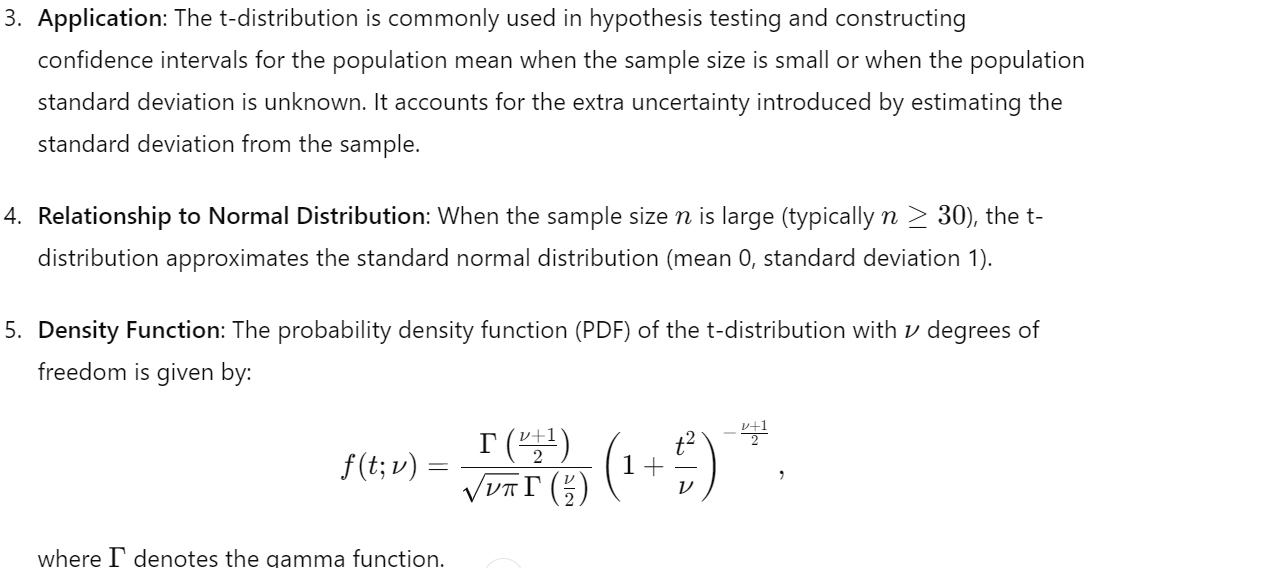
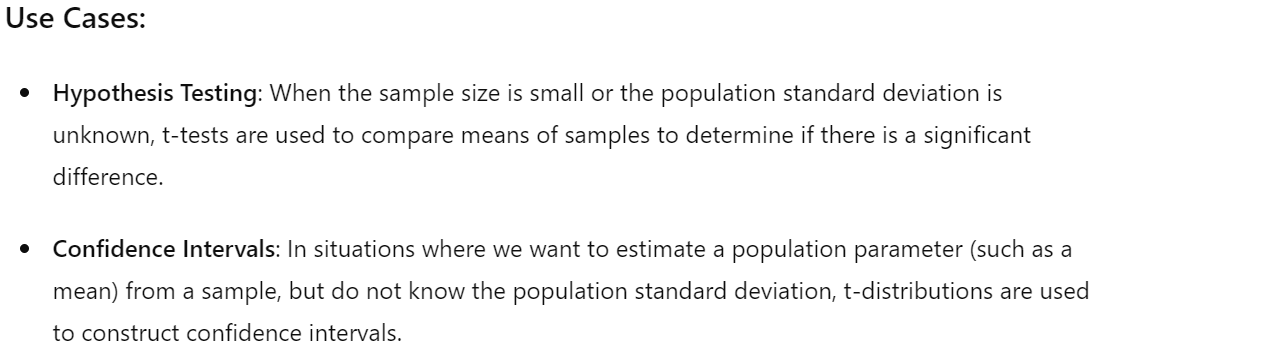

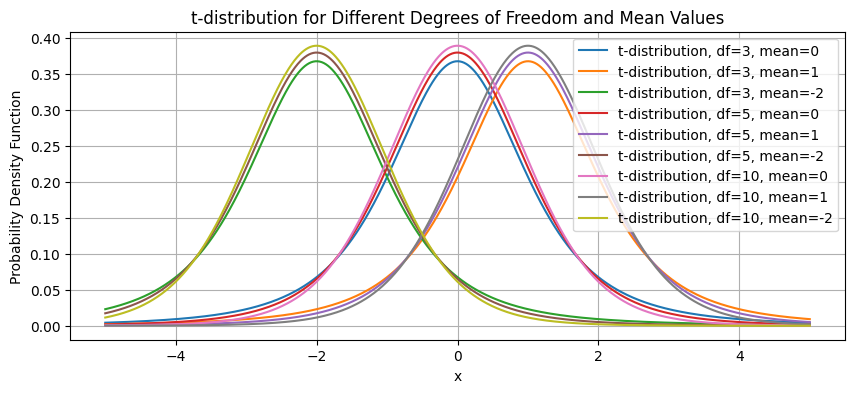

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters
degrees_of_freedom = [3, 5, 10]  # Degrees of freedom (nu)
mean_values = [0, 1, -2]         # Mean values for the t-distribution

# Generate x values for plotting
x = np.linspace(-5, 5, 1000)

# Plotting
plt.figure(figsize=(10, 4))

for df in degrees_of_freedom:
    for mean in mean_values:
        # Calculate the t-distribution PDF
        pdf = t.pdf(x, df, loc=mean)
        
        # Plot the PDF
        plt.plot(x, pdf, label=f't-distribution, df={df}, mean={mean}')

# Add labels, title, and legend
plt.title('t-distribution for Different Degrees of Freedom and Mean Values')
plt.xlabel('x')
plt.ylabel('Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()


# One sample t- distribution test

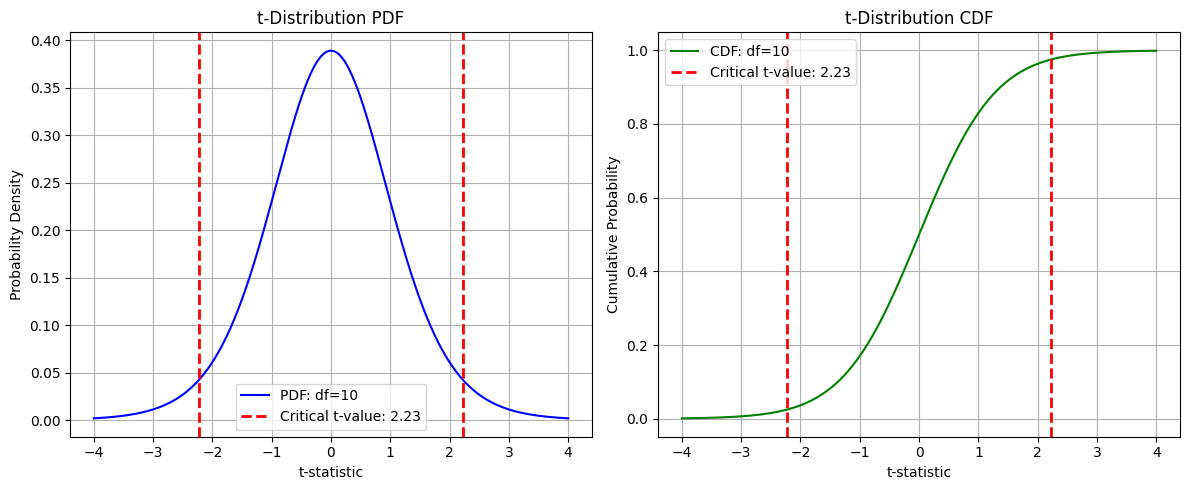

Reject Null Hypothesis: The mean score of the students differs significantly from the population mean.


In [42]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


# Given data
scores = np.array([10.5, 9, 7, 12, 8.5, 7.5, 6.5, 8, 11, 9.5])
population_mean = 12

# Calculate sample mean and standard deviation
sample_mean = np.mean(scores)
sample_std = np.std(scores, ddof=1)  # Use ddof=1 for sample standard deviation

# Number of observations
n = len(scores)

# Calculate the t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# Parameters
df = len(scores)  # degrees of freedom for t-distribution
alpha = 0.05  # significance level

# Generate x values for plotting
x = np.linspace(-4, 4, 1000)  # Adjust the range based on your distribution

# Compute PDF and CDF of t-distribution
pdf = stats.t.pdf(x, df)
cdf = stats.t.cdf(x, df)

# Calculate critical t-value for two-tailed test
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Plot t-distribution PDF and CDF
plt.figure(figsize=(12, 5))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(x, pdf, 'b-', label=f'PDF: df={df}')
plt.axvline(x=t_critical, color='r', linestyle='--', linewidth=2, label=f'Critical t-value: {t_critical:.2f}')
plt.axvline(x=-t_critical, color='r', linestyle='--', linewidth=2)
plt.title('t-Distribution PDF')
plt.xlabel('t-statistic')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, 'g-', label=f'CDF: df={df}')
plt.axvline(x=t_critical, color='r', linestyle='--', linewidth=2, label=f'Critical t-value: {t_critical:.2f}')
plt.axvline(x=-t_critical, color='r', linestyle='--', linewidth=2)
plt.title('t-Distribution CDF')
plt.xlabel('t-statistic')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)

# Display plot
plt.tight_layout()
plt.show()

# Determine significance
if np.abs(t_statistic) > t_critical:
    print("Reject Null Hypothesis: The mean score of the students differs significantly from the population mean.")
else:
    print("Fail to Reject Null Hypothesis: There is not enough evidence to conclude a significant difference.")

